# 1) Fair/fake coin example with probability: 0.5Beta(20,3)+0.5Beta(3,20)

Our model selection would be like the following:
$$
X | m  \sim
\left\{
    \begin{array}{ll}
     \delta (\pi - 0.5) & m = 0, fair\ coin \\
     0.5 B (\pi;20,3) + 0.5 B (\pi;3,20) & m = 1, fake\ coin
    \end{array}
\right.
\\
$$

Calculations for fair coin is same with ones that we did in the lecture
$$
p(X_{1:N},m=0) = \frac {1}{2^{(N+1)}} \\
$$

Calculation for fake coin would be changed with respect to new probability distribution. 
$$
\begin{equation}
    \begin{split}
        p(X_{1:N},m=1) &= \int d \pi p(m=1)p(\pi|m=1) \prod_{i=1}^N(x_{i}|\pi) \\
                       &= \int d \pi \ \Bigg( 0.5 \bigg( \pi ^{20+c0}(1-\pi)^{3+c1} \big(\frac {\Gamma(23)}{\Gamma(20)\Gamma(3)}\big)\bigg) + 0.5 \bigg( \pi ^{3+c0}(1-\pi)^{20+c1} \big(\frac {\Gamma(23)}{\Gamma(20)\Gamma(3)}\big)\bigg) \Bigg) \\
                       &= \frac {1}{2} \frac {\Gamma(23)}{\Gamma(20)\Gamma(3)} \int d \pi  \big( \pi^{20+c0}(1-\pi)^{3+c1}+\pi^{3+c0}(1-\pi)^{20+c1}\big) \\
                       &= \frac {1}{2} \frac {\Gamma(23)}{\Gamma(20)\Gamma(3)} \bigg( \frac {\Gamma(20+c0)\Gamma(3+c1)}{\Gamma(23+c0+c1)} + \frac {\Gamma(3+c0)\Gamma(20+c1)}{\Gamma(23+c0+c1)}\bigg)
    \end{split}
\end{equation}    
$$

In [6]:
import numpy as np
import scipy.special as sps
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#The function calculates ratio of marginal likelihood
def log_odds(c_0, c_1, a1, b1, a2, b2):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = (N+1)*np.log(0.5)
    #x=0.5*(sps.gamma(a1+c_0)*sps.gamma(b1+c_1)/sps.gamma(a1+b1%N))+0.5*(sps.gamma(a2+c_0)*sps.gamma(b2+c_1)/sps.gamma(a2+b2+N))
    M_fake = np.log(0.5)+0.5*(sps.gammaln(a1+b1)-sps.gammaln(a1)-sps.gammaln(b1))+0.5*(sps.gammaln(a2+b2)-sps.gammaln(a2)-sps.gammaln(b2))+np.log(0.5*(sps.gamma(a1+c_0)*sps.gamma(b1+c_1)/sps.gamma(a1+b1+N))+0.5*(sps.gamma(a2+c_0)*sps.gamma(b2+c_1)/sps.gamma(a2+b2+N)))
    return M_fair - M_fake

# TEST FOR THE FUNCTION
# Number of Zeros observed
#c_0 = 20
# Number of Ones
#c_1 = 20

# Prior
#a1 = 20
#b1 = 3

#a2 = 3
#b2 = 20

#print('log_odds = ', log_odds(c_0, c_1, a1, b1, a2, b2) )

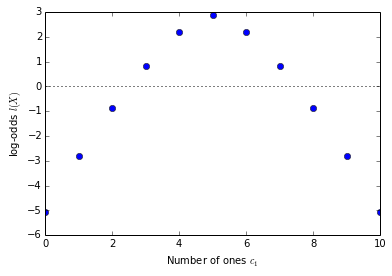

In [7]:
# Prior
a1 = 20
b1 = 3
a2 = 3
b2 = 20

N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a1, b1, a2, b2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

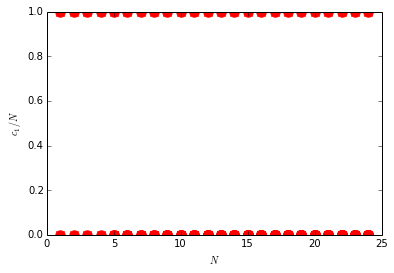

In [19]:
# Prior
a1 = 20
b1 = 3
a2 = 3
b2 = 20

for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a1, b1, a2, b2);
    
    
    idx = np.where(np.array(l)<0)
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

# Q74 from the booklet